In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [27]:
spy_df = pd.read_csv('./Monte_Carlo_Daily/HistoricalQuotes.csv')
spy_df = spy_df[1:]
spy_df.head()

,date,close,volume,open,high,low
1,2019/09/18,301.10,74192090.0000,300.49,301.2200,298.24
2,2019/09/17,300.92,42904430.0000,299.94,301.0200,299.75
3,2019/09/16,300.16,58191180.0000,299.84,301.1378,299.45
4,2019/09/13,301.09,62104840.0000,301.78,302.1700,300.68
5,2019/09/12,301.29,72908750.0000,301.25,302.4600,300.41


In [28]:
date_list = []
for date in spy_df['date']:
    date = datetime.strptime(date,'%Y/%m/%d')
    date = datetime.strftime(date,'%A')
    date_list.append(date)
spy_df['day_of_week'] = date_list
spy_df.head()

,date,close,volume,open,high,low,day_of_week
1,2019/09/18,301.10,74192090.0000,300.49,301.2200,298.24,Wednesday
2,2019/09/17,300.92,42904430.0000,299.94,301.0200,299.75,Tuesday
3,2019/09/16,300.16,58191180.0000,299.84,301.1378,299.45,Monday
4,2019/09/13,301.09,62104840.0000,301.78,302.1700,300.68,Friday
5,2019/09/12,301.29,72908750.0000,301.25,302.4600,300.41,Thursday


In [40]:
vol_list = []
for vol in spy_df['volume']:
    vol = float(vol)
    vol_list.append(vol)
spy_df['volume'] = vol_list
spy_df.head()

,date,close,volume,open,high,low,day_of_week
1,2019/09/18,301.10,74192090.0,300.49,301.2200,298.24,Wednesday
2,2019/09/17,300.92,42904430.0,299.94,301.0200,299.75,Tuesday
3,2019/09/16,300.16,58191180.0,299.84,301.1378,299.45,Monday
4,2019/09/13,301.09,62104840.0,301.78,302.1700,300.68,Friday
5,2019/09/12,301.29,72908750.0,301.25,302.4600,300.41,Thursday


In [41]:
pct_change = spy_df[['high','low','open','close','volume']].pct_change()
pct_change['day_of_week'] = spy_df['day_of_week']

In [51]:
grouped_df = pct_change.groupby('day_of_week').mean()
grouped_df = grouped_df.reset_index()
week_df = pd.concat([grouped_df[1:2],grouped_df[3:5],grouped_df[2:3],grouped_df[0:1]])
week_df = week_df.set_index('day_of_week')

In [52]:
grouped_df

,day_of_week,high,low,open,close,volume
0,Friday,0.002988,0.000984,0.001960,0.001982,0.254743
1,Monday,-0.000280,0.000878,0.002337,-0.001240,0.011882
2,Thursday,-0.000002,-0.000571,-0.001533,0.001857,0.063693
3,Tuesday,-0.001698,0.000506,-0.000964,-0.000358,-0.013066
4,Wednesday,-0.002727,-0.003510,-0.003860,-0.004199,-0.017989


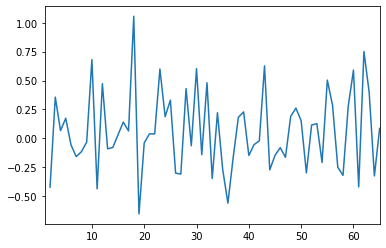

In [53]:
pct_change['volume'].plot()

Plot for Percent Change of High for Day of Week


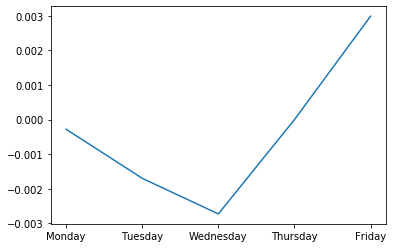



Plot for Percent Change of Low for Day of Week


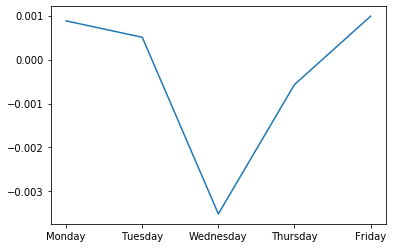



Plot for Percent Change of Open for Day of Week


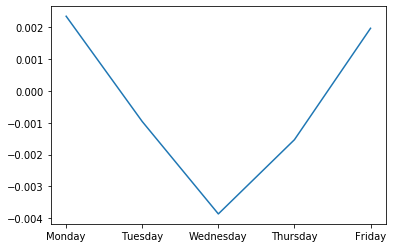



Plot for Percent Change of Close for Day of Week


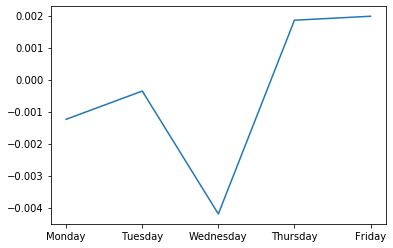



Plot for Percent Change of Volume for Day of Week


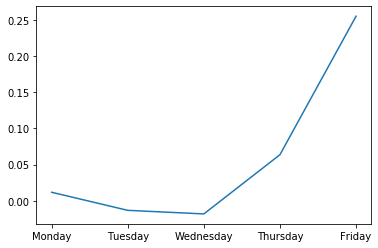

In [64]:
for col in week_df.columns:
    print(f'Plot for Percent Change of {col[0].upper() + col[1:]} for Day of Week')
    plot = plt.plot(week_df[col])
    plt.show()
    print('\n')